<a href="https://colab.research.google.com/github/AureliaWambui19/Autolib-blue-car-claim-investigation/blob/main/WambuiAurelia_week_4_core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.INTRODUCTION

# 1.1 Defining the question

Investigating the electric (bluecars) car usage in Paris during weekdays.

Test a Hypothesis: whether there is difference in the means of blue cars taken in two different postal codes selected randomly.

# 1..2 Metrics for success

#1.3 Understanding the context

In this project we will seek to understand electric car usage by solving for another research question.

We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

To do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method,

Then perform hypothesis testing with regards to the claim that we will have made.

An example of claim to test would be "Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z? Etc”.

The selected periods of interest be either weekdays or weekends but not a mix of both.

We can also consider postal codes as some of the areas of interest

#1.4 The experimental design taken

CDFDFD

# 1..5 Appropriateness of the data available

Dataset

The dataset to use for this project can be found here http://bit.ly/DSCoreAutolibDataset

The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging)

# 2.EXPLORATORY DATA ANALYSIS

# 2.1 Importing Libraries

In [138]:
# Importing libraries we will use in this project

import pandas as pd

import numpy as np

import seaborn as sns  # Visualization library

import matplotlib.pyplot as plt # plotting library

%matplotlib inline


from scipy import stats

from scipy.stats import norm

from scipy.stats import t

import math
import random



# 2.2 Loading the Dataset

In [82]:
# loading dataset named parr

parr = pd.read_csv("http://bit.ly/DSCoreAutolibDataset")

# 2.3 Viewing of the  paris dataset

In [83]:
# Viewing the first 3 entries of the dataset

parr.head(3)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27


In [84]:
# Viewing the last 3 entries of the dataset

parr.tail(3)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [85]:
# Checking the dataset information
parr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [86]:
#  Summary description of our dataset
parr.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [87]:
# Checking the dataset shape 
print('This dataset  has ' + str(parr.shape[0]) + ' rows and ' +  str(parr.shape[1]) + ' columns' )

This dataset  has 16085 rows and 13 columns


# Selecting period of interest

The selected periods of interest be either weekdays or weekends but not a mix of both

In [88]:
# In this project we are required to work with either tha weekdays or the weekends.
#my choice is weekdays


parisweekday = parr[parr['day_type'] == 'weekday']

In [89]:

# viewing the new dataset
print(parisweekday.shape)




(11544, 13)


In [90]:
# viewing the first 3  entries
parisweekday.head(3)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27


In [91]:
# viewing the last 3  entries
parisweekday.tail(3)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [92]:
#  Checking the dataset information of the new dataset
parisweekday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11544 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             11544 non-null  int64 
 1   date                    11544 non-null  object
 2   n_daily_data_points     11544 non-null  int64 
 3   dayOfWeek               11544 non-null  int64 
 4   day_type                11544 non-null  object
 5   BlueCars_taken_sum      11544 non-null  int64 
 6   BlueCars_returned_sum   11544 non-null  int64 
 7   Utilib_taken_sum        11544 non-null  int64 
 8   Utilib_returned_sum     11544 non-null  int64 
 9   Utilib_14_taken_sum     11544 non-null  int64 
 10  Utilib_14_returned_sum  11544 non-null  int64 
 11  Slots_freed_sum         11544 non-null  int64 
 12  Slots_taken_sum         11544 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.2+ MB


# 3.TYDING THE DATASET

# 3.1 Checking columns and rectifying any issue

In [93]:
# checking columns
# columns are noted to have different case and some have spaces
parisweekday.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [94]:
# making all columns to be in lower case and removing spaces
parisweekday.columns = parisweekday.columns.str.lower().str.replace(" ", "")


In [95]:
# checking columns to confirm whether they are now in the same lower case
parisweekday.columns 

Index(['postalcode', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [96]:
# Dropping columns not needed for this analysis
#  with Blue cars are the only  point of interest  for this project. 
parisweekday.drop(['utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum'], axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [97]:
# verifying if the dropped columns have been dropped
parisweekday.columns

Index(['postalcode', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'slots_freed_sum',
       'slots_taken_sum'],
      dtype='object')

# 3.2 Missing values

In [98]:
# Checking for missing values in our dataset by column

parisweekday.isnull().sum()


# there are  no missing values 

postalcode               0
date                     0
n_daily_data_points      0
dayofweek                0
day_type                 0
bluecars_taken_sum       0
bluecars_returned_sum    0
slots_freed_sum          0
slots_taken_sum          0
dtype: int64

# 3.3 Anomalies

In [99]:
# Checking for Anomalies

# checking for duplicates 
# there are no duplicated in the dataset
parisweekday_duplicate = parisweekday[parisweekday.duplicated()]
parisweekday_duplicate.shape

(0, 9)

# 3.4 Outliers

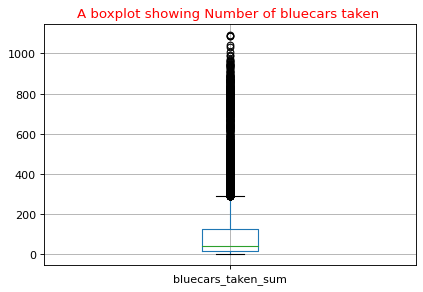

In [100]:
#Checking for outliers
plt.figure(dpi = 80)
parisweekday.boxplot(['bluecars_taken_sum'])
plt.title("A boxplot showing Number of bluecars taken ", color = 'red')
plt.show()
# The boxplot shows  of outliers 
# the outliers will not be removed as they will alter the dataset

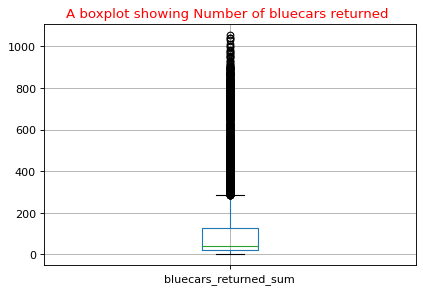

In [101]:
plt.figure(dpi = 80)
parisweekday.boxplot(['bluecars_returned_sum'])
plt.title("A boxplot showing Number of bluecars returned ", color = 'red')
plt.show()
# The boxplot shows  of outliers 
# the outliers will not be removed as they will alter the dataset

# 4.UNIVARIATE ANALYSIS

In [102]:
parisweekday.columns

Index(['postalcode', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'slots_freed_sum',
       'slots_taken_sum'],
      dtype='object')

In [103]:
parisweekday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11544 entries, 0 to 16084
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   postalcode             11544 non-null  int64 
 1   date                   11544 non-null  object
 2   n_daily_data_points    11544 non-null  int64 
 3   dayofweek              11544 non-null  int64 
 4   day_type               11544 non-null  object
 5   bluecars_taken_sum     11544 non-null  int64 
 6   bluecars_returned_sum  11544 non-null  int64 
 7   slots_freed_sum        11544 non-null  int64 
 8   slots_taken_sum        11544 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 901.9+ KB


#4.1 Histograms

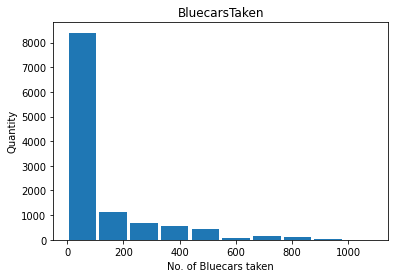

In [104]:
# Histogram of the bluecars_taken sum
BluecarsTaken= parisweekday['bluecars_taken_sum']
plt.hist(BluecarsTaken, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('No. of Bluecars taken')
plt.ylabel('Quantity')
plt.title('BluecarsTaken')
plt.show()

# the histogram shows us that the blue cars taken distribution is skewed to the right
# this is because the tail is long to the right hand side

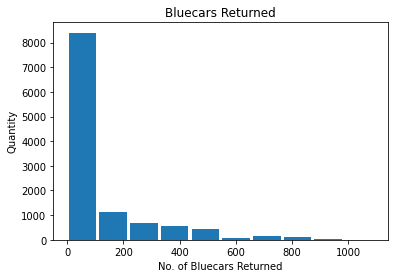

In [105]:
# Histogram of the bluecars_taken sum
BluecarsReturned= parisweekday['bluecars_returned_sum']
plt.hist(BluecarsTaken, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('No. of Bluecars Returned')
plt.ylabel('Quantity')
plt.title('Bluecars Returned')
plt.show()
# the histogram shows u that the blue cars returned distribution is skewed to the right
# this is because the tail is long to the right side

# 4.2 Frequency tables

In [106]:
# Frequency table of number of daily data points that were available for aggregation, that day 
pd.crosstab(index=parisweekday['n_daily_data_points'], columns='count')
# 1440 was the most frequent number of daily data points that were available for aggregation in most days

col_0,count
n_daily_data_points,
1174,104
1203,103
1320,103
1364,103
1370,94
1377,102
1389,103
1398,104
1411,104


In [107]:
# Converting the day of week from from numericals to strings for plotting

#

parisweekday['dayofweek'] = parisweekday.dayofweek.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday'})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [108]:
# Frequency table showing sum of bluecars taken by day of week in ascending order.

parisweekday.groupby('dayofweek')['bluecars_taken_sum'].sum().sort_values()

# Friday was when most blue cars were taken.
# while Wednesday was when the least number of blue cars were taken.

dayofweek
Wednesday    261849
Tuesday      261940
Thursday     263207
Monday       263893
Friday       288546
Name: bluecars_taken_sum, dtype: int64

# 4.3 Measures of central tendency

In [109]:
# MEAN
# Mean or Average is a central tendency of the data i.e. a number around which a whole data is spread out
parisweekdaycolums = ['n_daily_data_points', 'bluecars_taken_sum', 'bluecars_returned_sum', 'slots_freed_sum',
       'slots_taken_sum']
for column in parisweekdaycolums:
  print('The mean ' + column + ' is : ' + str(parisweekday[column].mean()))


The mean n_daily_data_points is : 1430.0072765072764
The mean bluecars_taken_sum is : 116.0286729036729
The mean bluecars_returned_sum is : 115.63937976437977
The mean slots_freed_sum is : 20.94516632016632
The mean slots_taken_sum is : 20.921431046431046


In [110]:
# Mode is the term appearing maximum time in a given data set.
for column in parisweekdaycolums:
  print('The Mode of ' + column + ' is ; ' + str(parisweekday[column].mode()))

The Mode of n_daily_data_points is ; 0    1440
dtype: int64
The Mode of bluecars_taken_sum is ; 0    12
dtype: int64
The Mode of bluecars_returned_sum is ; 0    12
dtype: int64
The Mode of slots_freed_sum is ; 0    0
dtype: int64
The Mode of slots_taken_sum is ; 0    0
dtype: int64


In [111]:
# Median is the value which divides the data in 2 equal parts;
for column in parisweekdaycolums:
  print('The median of ' + column + ' is ; ' + str(parisweekday[column].median()))

The median of n_daily_data_points is ; 1440.0
The median of bluecars_taken_sum is ; 42.0
The median of bluecars_returned_sum is ; 42.0
The median of slots_freed_sum is ; 0.0
The median of slots_taken_sum is ; 0.0


# 5 BIVARIATE ANALYSIS

# 5.1 Scatter plot

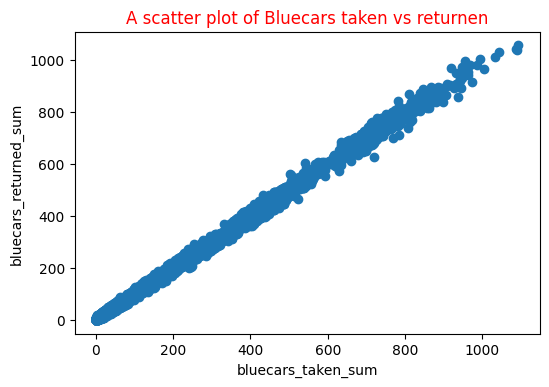

In [150]:

# Specifying the chart size
plt.figure(dpi = 100)
# plotting our scatterplot 
plt.scatter(parisweekday['bluecars_taken_sum'], parisweekday['bluecars_returned_sum'])

# Giving the scatterplot a title
plt.title('A scatter plot of Bluecars taken vs returnen', color = 'red')

# Labelling the x axis
plt.xlabel('bluecars_taken_sum')

# Labelling the y axis
plt.ylabel('bluecars_returned_sum')

# We then display our scatterplot 
plt.show()


# There is strong positive correlation between Bluecars returned vs those taken taken.


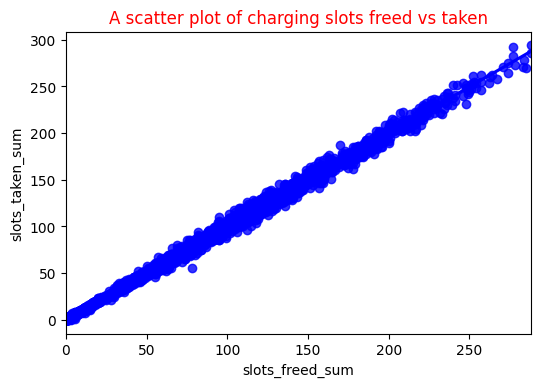

In [151]:
plt.figure(dpi = 100)
sns.regplot(x = parisweekday["slots_freed_sum"], y = parisweekday["slots_taken_sum"], fit_reg=True, color = 'blue')
plt.title("A scatter plot of charging slots freed vs taken", color = 'red')
plt.show()
# There is strong positive correlation between charging slots taken vs released.

#5.2 Correlation matrix

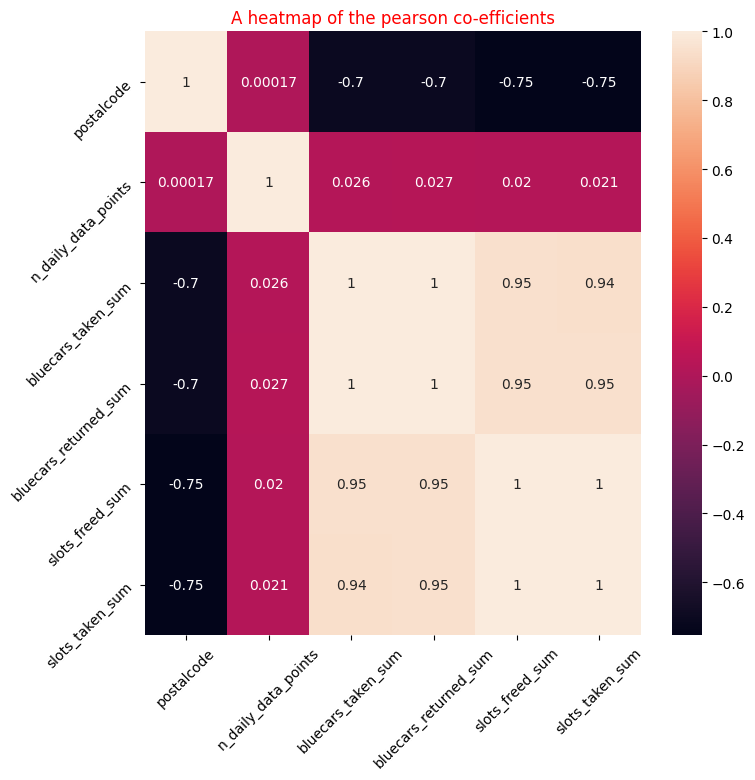

In [114]:
BlueMatrix = parisweekday.corr()
plt.figure(figsize = (8,8), dpi = 100)
sns.heatmap(BlueMatrix, xticklabels = BlueMatrix.columns, yticklabels=BlueMatrix.columns, annot = True)
plt.title('A heatmap of the pearson co-efficients', color = "red")
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

# there is a strong positive correlation (0.95) between bluecars_taken_sum and and 	slots_freed_sum 

# 6 SAMPLING 

#6.1 Simple random sampling

A simple random sample is a subset of a statistical population 
### in which each member of the subset has an equal probability of being chosen. 
### A simple random sample is meant to be an unbiased representation of a group.

### Major advantages include its simplicity and lack of bias

In [115]:
# creating a new dataframe containing our simple random sample 
# sample size = 5000
# the sample will be selected without replacement


parisweekdaysample= parisweekday.sample(n = 5000, replace = 'False')


In [116]:
# Confriming the size of our sample
# viewing the head of the created sample
print(parisweekdaysample.shape)
parisweekdaysample.head()


(5000, 9)


,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
10567,93150,5/31/2018,1411,Thursday,weekday,6,9,3,3
15456,94700,6/15/2018,1440,Friday,weekday,44,37,0,0
14978,94410,6/4/2018,1440,Monday,weekday,18,23,0,0
7241,92290,3/13/2018,1440,Tuesday,weekday,14,15,0,0
9809,92700,6/18/2018,1440,Monday,weekday,79,79,0,0


In [117]:
## converting the date column to datetime format 
#  We will extract the month for plotting purposes

parisweekdaysample['date'] = pd.to_datetime(parisweekdaysample.date)

# 6.2 Stratified sampling

### Stratified sampling refers to a type of sampling method. 
### With stratified sampling, the researcher divides the population into separate groups, called strata. 
### Then, a probability sample (often a simple random sample ) is drawn from each group.

### Stratified sampling has several advantages over simple random sampling. 
## For example, using stratified sampling, 
### it may be possible to reduce the sample size required to achieve a given precision. 
### Or it may be possible to increase the precision with the same sample size

In [118]:
# creating a new column called month
# for this project our stratas are the months

parisweekdaysample['month'] = pd.DatetimeIndex(parisweekdaysample['date']).month  

In [119]:
# checking the new column created
parisweekdaysample.head()

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum,month
10567,93150,2018-05-31,1411,Thursday,weekday,6,9,3,3,5
15456,94700,2018-06-15,1440,Friday,weekday,44,37,0,0,6
14978,94410,2018-06-04,1440,Monday,weekday,18,23,0,0,6
7241,92290,2018-03-13,1440,Tuesday,weekday,14,15,0,0,3
9809,92700,2018-06-18,1440,Monday,weekday,79,79,0,0,6


In [120]:
# Selecting a stratified sample 
# By month of the year.

strat_sample = parisweekdaysample.groupby(['month'],group_keys = False).apply(lambda month : month.sample(frac = 0.1))

In [121]:
# checking the new stratified sample selected

print(strat_sample.shape)

strat_sample.head()

(500, 10)


,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum,month
10302,93130,2018-01-24,1434,Wednesday,weekday,15,22,0,0,1
181,75002,2018-01-26,1437,Friday,weekday,176,175,36,36,1
7811,92330,2018-01-15,1440,Monday,weekday,28,29,2,2,1
13438,94120,2018-01-05,1440,Friday,weekday,43,44,0,0,1
12364,93500,2018-01-22,1440,Monday,weekday,48,48,0,0,1


# 7.HYPOTHESIS TESTING

In [122]:
# Using a Z test to conduct our Hypothesis.
# It is the appropriate test to use here since we have a dataset larger than 30 observations.
# 

In [140]:
# Selecting two postal codes using simple random sampling
random.seed(3)
postal_sample = parisweekdaysample.sample(n = 2, replace = False)
postal_sample

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum,month
13620,94130,2018-01-31,1440,Wednesday,weekday,17,18,0,0,1
10406,93130,2018-05-22,1438,Tuesday,weekday,20,26,0,0,5


In [124]:
# Step 1
# Stating the Hypothesis
# H0 : The difference in the mean of blue cars taken in postal code 94130 and 93130 is 0
# H1 : The difference in the mean of blue cars taken in postal code 94130 and 93130 is not 0

In [125]:
# Step 2
# Level of significance
# α = 0.05

In [141]:
# Creating a dataframe containing the 94130 postal code as pc1
pc1 = parisweekdaysample[parisweekdaysample['postalcode'] == 94130]
pc1.head(2)

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum,month
13716,94130,2018-05-21,1440,Monday,weekday,41,48,0,0,5
13699,94130,2018-04-23,1417,Monday,weekday,30,35,0,0,4


In [142]:
# Creating a dataframe containing the 93130 postal code as pc2

pc2 = parisweekdaysample[parisweekdaysample['postalcode'] == 93130]
pc2.head(2)

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum,month
10280,93130,2018-01-02,1438,Tuesday,weekday,26,28,0,0,1
10369,93130,2018-04-04,1440,Wednesday,weekday,53,56,0,0,4


In [143]:
#Step  3 Give the value of the test statistic
ztest , z= stests.ztest(pc1['bluecars_taken_sum'], x2= pc2['bluecars_taken_sum'], value=0, alternative='two-sided')

print(float(z))

0.2841161756264192


In [144]:
#Step  4  Report the P-value
prob = stats.norm.cdf(ztest)
prob

0.8579419121867904

In [130]:
#Step  5 Clearly state your conclusion (i.e. ‘Reject the Null’ is not sufficient)
# The p-value is 0.8579419121867904
# this p-value is a greater than  the level of significance (0.05)
# Hence I will fail to  reject the Null Hypothesis


In [145]:
# sample mean of  bluecars taken in pc2 -This is the point estimate
s=pc2.bluecars_taken_sum.mean()
s

27.225

In [146]:
# sample size of  bluecars taken in pc2 earlier created 
sample_size = pc2.bluecars_taken_sum.shape[0]
sample_size

40

In [147]:
# Finding the standard error of the  mean of  bluecars taken in pc2 earlier created 
#
std_error = pc2.bluecars_taken_sum.std() / np.sqrt(sample_size)
std_error

2.3510738135845664

In [148]:
# lower bounds of the confidence level
lower_bound_95_perc = s - 1.96*std_error
lower_bound_95_perc

22.61689532537425

In [149]:
# lower bounds of the confidence level
upper_bound_95_perc = s + 1.96*std_error
upper_bound_95_perc
# We can be 95% certain that the bluecars taken in pc2 earlier created is between 22.61689532537425 and 31.83310467462575

31.83310467462575

### 9.0 SUMMARY AND CONCLUSIONS

### Project was initialized by obtaining the required data and loading it in the notebook
### Data cleaning was done,exploratory data analysis was done shortly after.
### A hypothesis was tested by following five steps
### It was concluded that the null hypothesis had failed to be rejected.
### A project report was prepared by the data scientist and shared with the service company.
